In [1]:
# TODO:

In [2]:
# Imports
import datetime
import matplotlib
import pandas
import seaborn

In [3]:
# Read in data
train = pandas.read_csv('raw_data/train_2016_v2.csv')
train['transactiondate'] = pandas.to_datetime(train['transactiondate'])
train = train.rename(columns={'transactiondate' : 'transaction_date',
                              'parcelid'        : 'parcel_id'})

In [4]:
train['dayofweek'] = train['transaction_date'].dt.dayofweek
train['weekday_name'] = train['transaction_date'].apply(lambda x: datetime.datetime.strftime(x, '%A'))
train['month'] = train['transaction_date'].dt.month
train['year'] = train['transaction_date'].dt.year
train['abs_logerror'] = train['logerror'].abs()
train = train[['transaction_date', 'parcel_id', 'logerror', 'abs_logerror',
               'dayofweek', 'weekday_name', 'month', 'year']]

In [5]:
train.head()

,transaction_date,parcel_id,logerror,abs_logerror,dayofweek,weekday_name,month,year
0,2016-01-01,11016594,0.0276,0.0276,4,Friday,1,2016
1,2016-01-01,14366692,-0.1684,0.1684,4,Friday,1,2016
2,2016-01-01,12098116,-0.0040,0.0040,4,Friday,1,2016
3,2016-01-02,12643413,0.0218,0.0218,5,Saturday,1,2016
4,2016-01-02,14432541,-0.0050,0.0050,5,Saturday,1,2016


### Plot

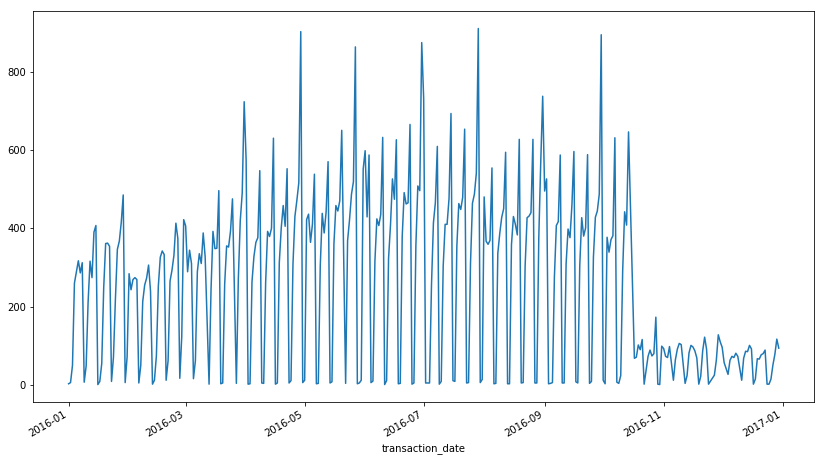

In [6]:
date_counts = train.groupby('transaction_date').count()['parcel_id']
date_counts.plot(figsize=(14,8))
matplotlib.pyplot.show()

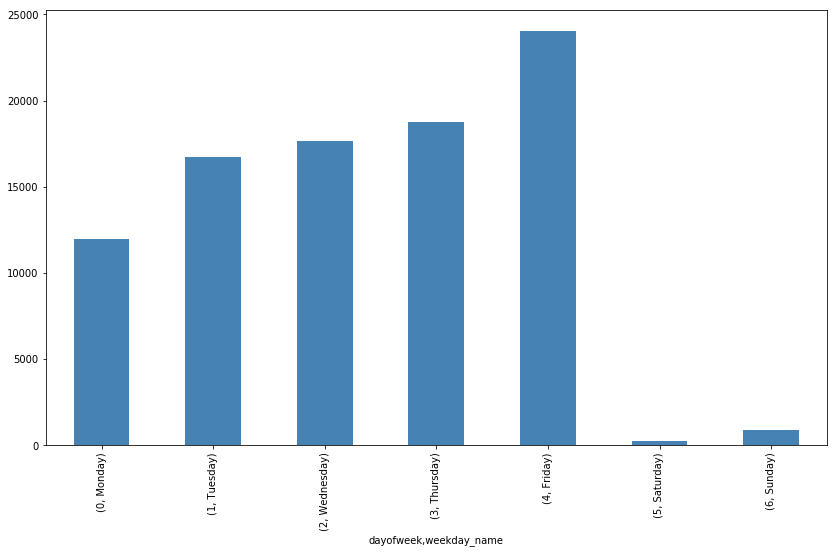

In [7]:
dayofweek_counts = train.groupby(['dayofweek', 'weekday_name']).count()['parcel_id']
dayofweek_counts.plot.bar(figsize=(14,8), color='steelblue')
matplotlib.pyplot.show()

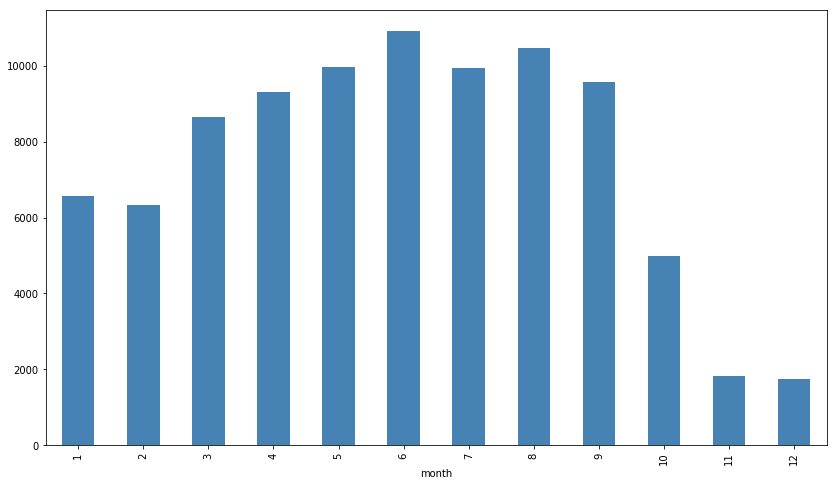

In [8]:
month_counts = train.groupby('month').count()['parcel_id']
month_counts.plot.bar(figsize=(14,8), color='steelblue')
matplotlib.pyplot.show()

In [9]:
train['logerror'].describe()

count    90275.000000
mean         0.011457
std          0.161079
min         -4.605000
25%         -0.025300
50%          0.006000
75%          0.039200
max          4.737000
Name: logerror, dtype: float64

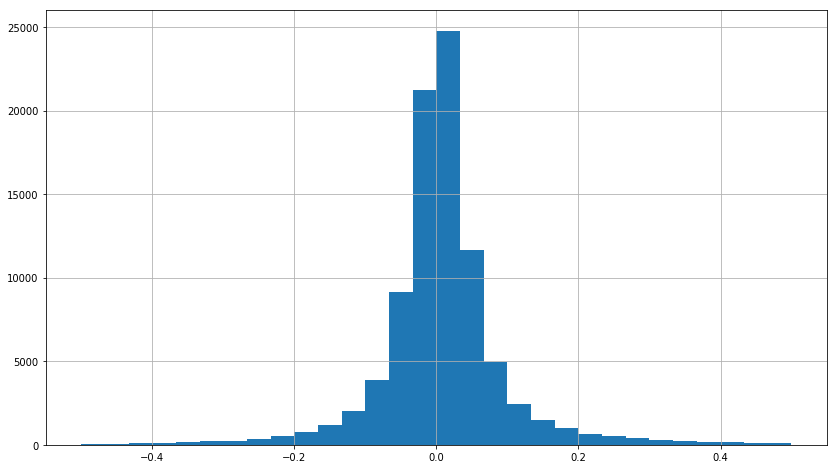

In [10]:
train.query("logerror >= -0.5 and logerror <= 0.5")['logerror'] \
     .hist(figsize=(14,8), bins=30)
matplotlib.pyplot.show()

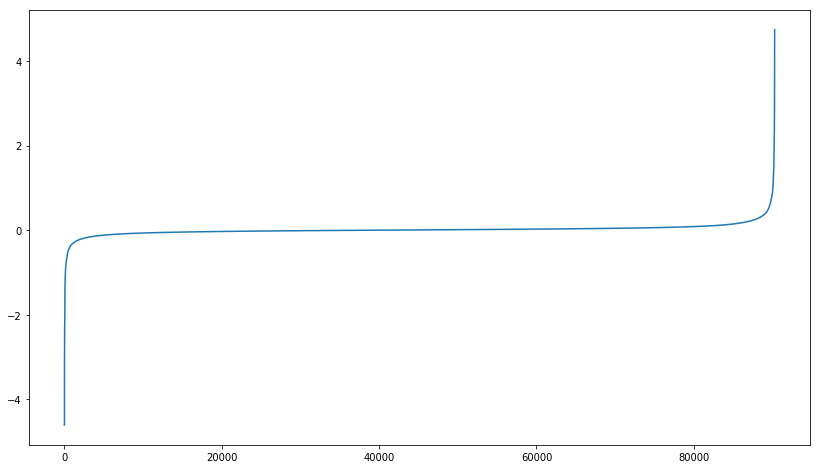

In [11]:
train['logerror'].sort_values().reset_index(drop=True).plot(figsize=(14,8))
matplotlib.pyplot.show()

In [12]:
train['logerror'].abs().describe()

count    90275.000000
mean         0.068447
std          0.146262
min          0.000000
25%          0.013900
50%          0.032500
75%          0.069400
max          4.737000
Name: logerror, dtype: float64

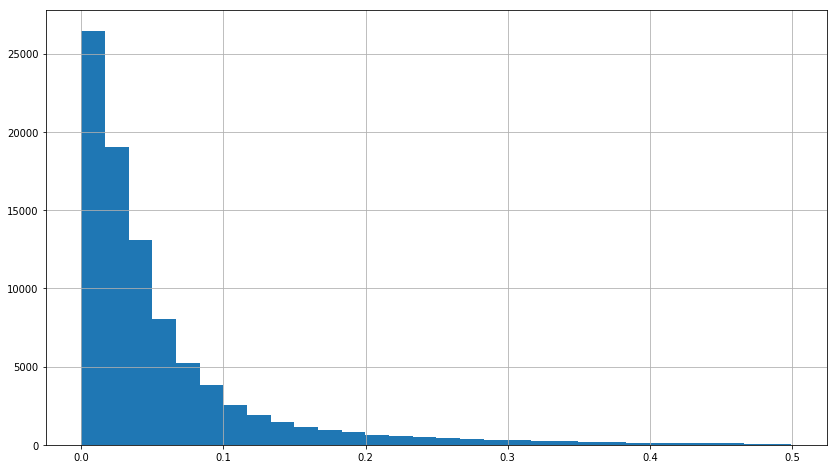

In [13]:
train.query("logerror >= -0.5 and logerror <= 0.5")['logerror'] \
     .abs().hist(figsize=(14,8), bins=30)
matplotlib.pyplot.show()

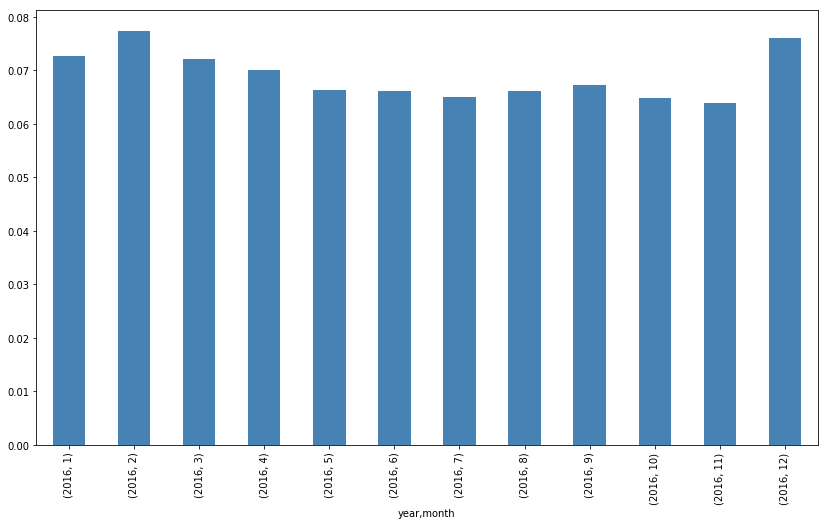

In [14]:
abs_err_over_time = train.groupby(['year', 'month']).mean()['abs_logerror']
abs_err_over_time.plot.bar(figsize=(14,8), color='steelblue')
matplotlib.pyplot.show()

### Join in property data

In [15]:
properties = pandas.read_csv('data/properties_2016_cleaned.csv')

In [16]:
train_data = train.merge(properties, on='parcel_id')

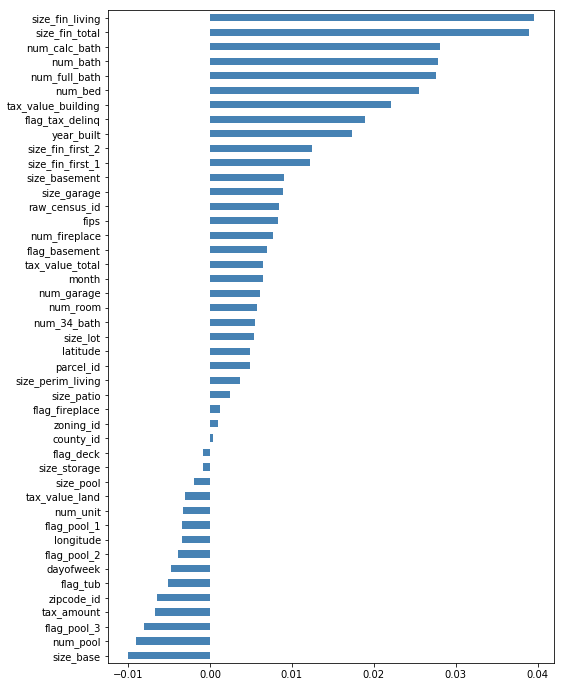

In [17]:
correlations = train_data.corr()['logerror'].sort_values()
correlations = correlations[~correlations.index.isin(['abs_logerror', 'logerror'])]
correlations = correlations.dropna()
correlations.plot.barh(figsize=(8,12), color='steelblue')
matplotlib.pyplot.show()

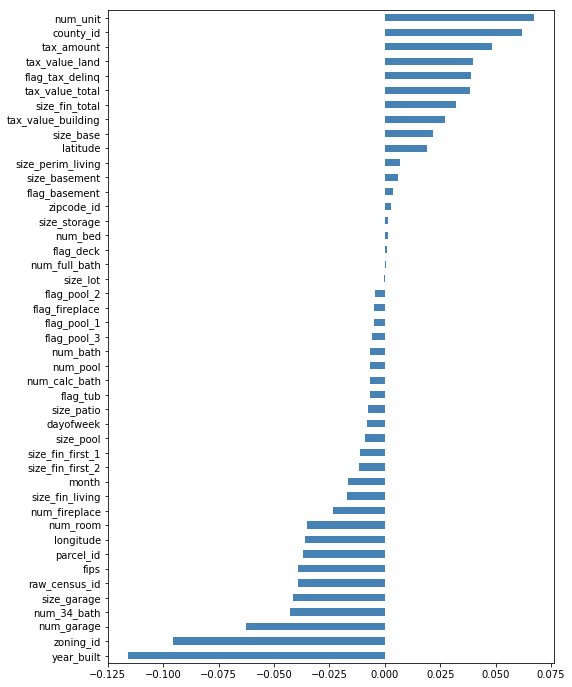

In [18]:
correlations = train_data.corr()['abs_logerror'].sort_values()
correlations = correlations[~correlations.index.isin(['abs_logerror', 'logerror'])]
correlations = correlations.dropna()
correlations.plot.barh(figsize=(8,12), color='steelblue')
matplotlib.pyplot.show()

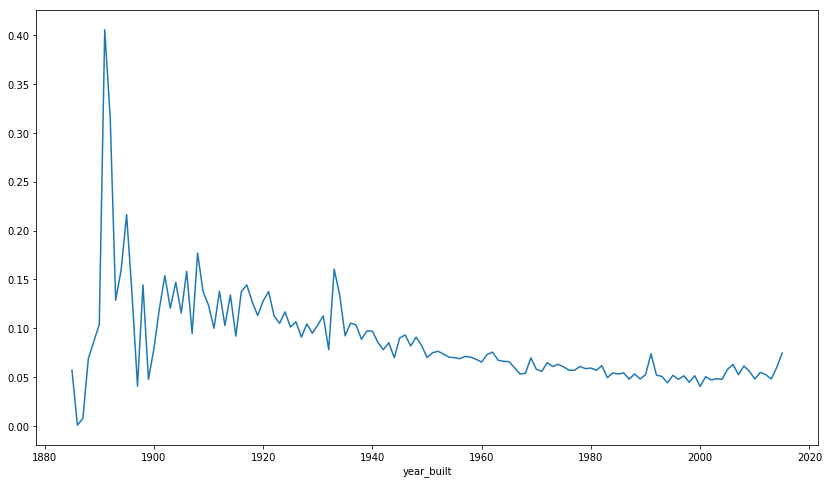

In [19]:
train_data.groupby('year_built').mean()['abs_logerror'].plot(figsize=(14,8))
matplotlib.pyplot.show()